<a href="https://colab.research.google.com/github/xhang24/xiaotong/blob/master/src/%E2%80%9Coption_combinations_ipynb%E2%80%9D%E7%9A%84HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Recall that, 


__Written K-strike straddle__ is a portfolio of
- selling K-strike call of one unit
- selling K-strike put of one unit

__Butterfly__ with three stikes $K_1 < K_2 < K_3$ is the portfolio of
- 1 unit of written K-strike straddle
- 1 unit of purchased K-strike call
- 1 unit of purchased K-strike put

Plot a diagram of exercise price versus payoff for the following portfolios:
- written 40-strike straddle
- a butterfly consists of
  - written 40-strike straddle
  - purchased 45-strike call
  - purchased 35-strike put

In [0]:
import numpy as np



In [0]:
class VOption:
  def __init__(
      self, 
      otype=1, 
      strike=110, 
      maturity=1, 
      market_price = 10.):
    self.otype=otype
    self.strike=strike
    self.maturity=maturity
    self.market_price=market_price
    
  def payoff(self, S):
    results=[]
    otype=self.otype
    K=self.strike
    maturity=self.maturity
    for s in S:
      results.append(np.max([0,(s-K)*otype]))#Payoff of European call with strike $K$ and exercise price $S$ is given as
    return results

In [0]:
import matplotlib.pyplot as plt

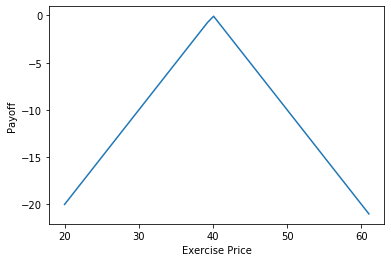

In [52]:
def Straddle(K, S):
  call=VOption(otype=1,strike=K)
  put=VOption(otype=-1,strike=K)
  OP1=VOption.payoff(call,S)
  OP2=VOption.payoff(put,S)
  return np.add(OP1,OP2)
s=np.linspace(20, 61)
K=40
ys=Straddle(K,s)
plt.figure('Straddle')
plt.xlabel('Exercise Price')
plt.ylabel('Payoff')
plt.plot(s,-ys)
plt.show()

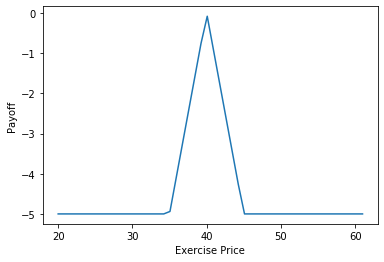

In [55]:
def Butterfly(K1, K2, K3, S):
  call=VOption(otype=1, strike=K3)
  put=VOption(otype=-1, strike=K1)
  OPP1=VOption.payoff(call, S)
  OPP2=VOption.payoff(put,S)
  return np.add(np.add(OPP1,OPP2),-Straddle(K2, S))
S=np.linspace(20,61)
K=40
ys=Butterfly(35, 40, 45, S)
plt.figure('Butterfly')
plt.xlabel('Exercise Price')
plt.ylabel('Payoff')
plt.plot(S,ys)
plt.show()